# Introduction to scikit-learn & scikit-image

In [1]:
%matplotlib inline

# `scikit-learn` - Machine Learning in Python

[scikit-learn](http://scikit-learn.org) is a simple and efficient tool for data mining and data analysis. It is built on [NumPy](www.numpy.org), [SciPy](https://www.scipy.org/), and [matplotlib](https://matplotlib.org/). The following examples show some of `scikit-learn`'s power. For a complete list, go to the official homepage under [examples](http://scikit-learn.org/stable/auto_examples/index.html) or [tutorials](http://scikit-learn.org/stable/tutorial/index.html).

## Blind source separation using FastICA

This example of estimating sources from noisy data is adapted from [`plot_ica_blind_source_separation`](http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [3]:
# Generate sample data
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)                   # Signal 1: sinusoidal signal
s2 = np.sign(np.sin(3 * time))          # Signal 2: square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data

# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

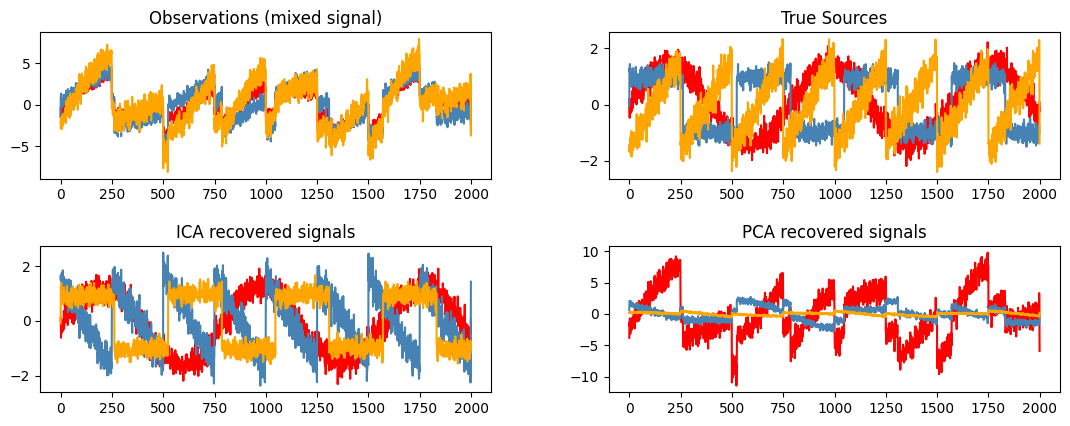

In [4]:
# Plot results
plt.figure(figsize=(12, 4))

models = [X, S, S_, H]
names = ['Observations (mixed signal)', 'True Sources',
         'ICA recovered signals', 'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 2, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

# Anomaly detection with Local Outlier Factor (LOF)

This example presents the Local Outlier Factor (LOF) estimator. The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors. This example is adapted from [`plot_lof`](http://scikit-learn.org/stable/auto_examples/neighbors/plot_lof.html).

In [9]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [10]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

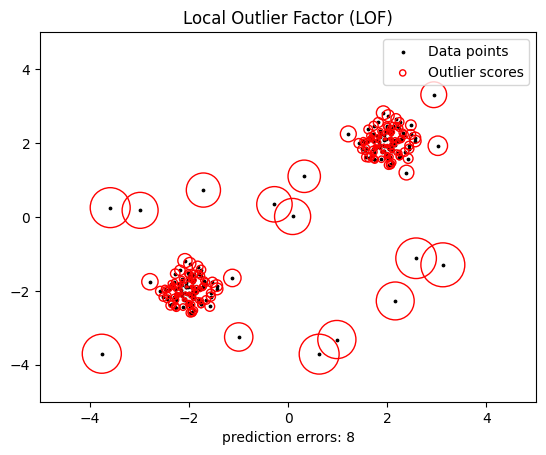

In [11]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

# SVM: Maximum margin separating hyperplane

Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with a linear kernel. This example is adapted from [`plot_separating_hyperplane`](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html).

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

In [13]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

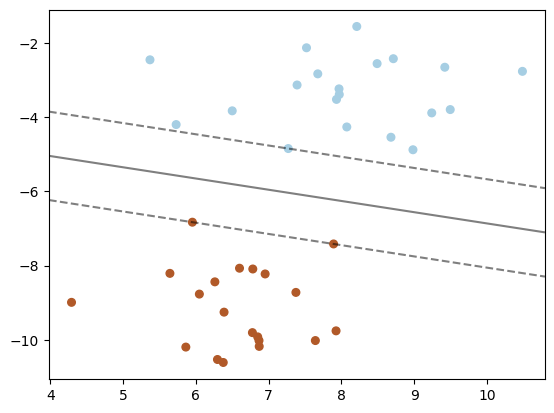

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

# `Scikit-Image` - Image processing in python

[scikit-image](http://scikit-image.org/) is a collection of algorithms for image processing and is based on [scikit-learn](http://scikit-learn.org). The following examples show some of `scikit-image`'s power. For a complete list, go to the official homepage under [examples](http://scikit-image.org/docs/stable/auto_examples/).

## Sliding window histogram

Histogram matching can be used for object detection in images. This example extracts a single coin from the `skimage.data.coins` image and uses histogram matching to attempt to locate it within the original image. This example is adapted from [`plot_windowed_histogram`](http://scikit-image.org/docs/stable/auto_examples/features_detection/plot_windowed_histogram.html).

In [21]:
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data, transform
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.filters import rank

In [22]:
def windowed_histogram_similarity(image, selem, reference_hist, n_bins):

    # Compute normalized windowed histogram feature vector for each pixel
    px_histograms = rank.windowed_histogram(image, selem, n_bins=n_bins)

    # Reshape coin histogram to (1,1,N) for broadcast when we want to use it in
    # arithmetic operations with the windowed histograms from the image
    reference_hist = reference_hist.reshape((1, 1) + reference_hist.shape)

    # Compute Chi squared distance metric: sum((X-Y)^2 / (X+Y));
    # a measure of distance between histograms
    X = px_histograms
    Y = reference_hist

    num = (X - Y) ** 2
    denom = X + Y
    denom[denom == 0] = np.infty
    frac = num / denom

    chi_sqr = 0.5 * np.sum(frac, axis=2)

    # Generate a similarity measure. It needs to be low when distance is high
    # and high when distance is low; taking the reciprocal will do this.
    # Chi squared will always be >= 0, add small value to prevent divide by 0.
    similarity = 1 / (chi_sqr + 1.0e-4)

    return similarity

In [23]:
# Load the `skimage.data.coins` image
img = img_as_ubyte(data.coins())

# Quantize to 16 levels of greyscale; this way the output image will have a
# 16-dimensional feature vector per pixel
quantized_img = img // 16

# Select the coin from the 4th column, second row.
# Co-ordinate ordering: [x1,y1,x2,y2]
coin_coords = [184, 100, 228, 148]   # 44 x 44 region
coin = quantized_img[coin_coords[1]:coin_coords[3],
                     coin_coords[0]:coin_coords[2]]

# Compute coin histogram and normalize
coin_hist, _ = np.histogram(coin.flatten(), bins=16, range=(0, 16))
coin_hist = coin_hist.astype(float) / np.sum(coin_hist)

# Compute a disk shaped mask that will define the shape of our sliding window
# Example coin is ~44px across, so make a disk 61px wide (2 * rad + 1) to be
# big enough for other coins too.
selem = disk(30)

# Compute the similarity across the complete image
similarity = windowed_histogram_similarity(quantized_img, selem, coin_hist,
                                           coin_hist.shape[0])

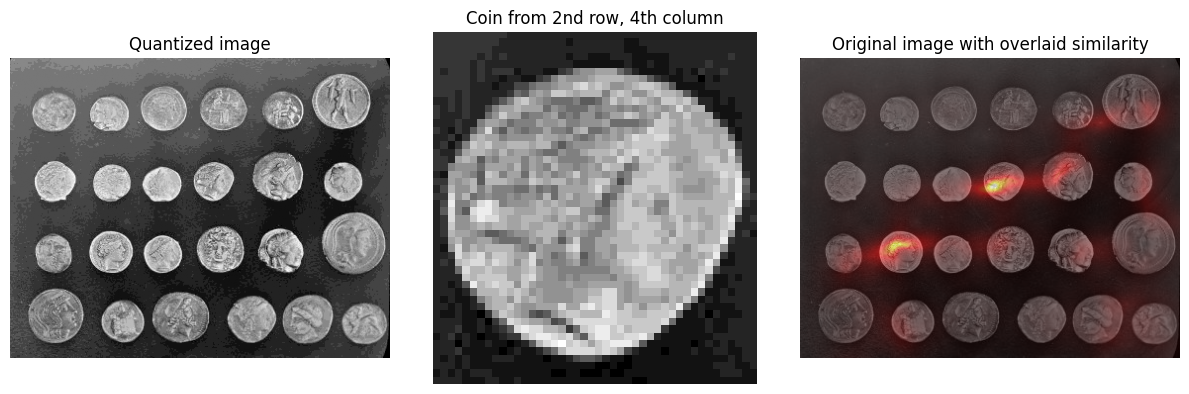

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].imshow(quantized_img, cmap='gray')
axes[0].set_title('Quantized image')
axes[0].axis('off')

axes[1].imshow(coin, cmap='gray')
axes[1].set_title('Coin from 2nd row, 4th column')
axes[1].axis('off')

axes[2].imshow(img, cmap='gray')
axes[2].imshow(similarity, cmap='hot', alpha=0.5)
axes[2].set_title('Original image with overlaid similarity')
axes[2].axis('off')

plt.tight_layout()
plt.show()

## Local Thresholding

If the image background is relatively uniform, then you can use a global threshold value as presented above. However, if there is large variation in the background intensity, adaptive thresholding (a.k.a. local or dynamic thresholding) may produce better results. This example is adapted from [`plot_thresholding`](http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html#local-thresholding).

In [25]:
from skimage.filters import threshold_otsu, threshold_local

image = data.page()

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
adaptive_thresh = threshold_local(image, block_size, offset=10)
binary_adaptive = image > adaptive_thresh

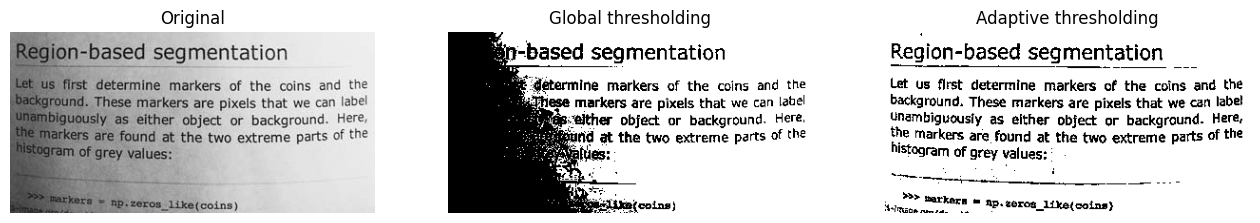

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 6))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_adaptive)
ax[2].set_title('Adaptive thresholding')

for a in ax:
    a.axis('off')
    
plt.show()

## Finding local maxima

The peak_local_max function returns the coordinates of local peaks (maxima) in an image. A maximum filter is used for finding local maxima. This operation dilates the original image and merges neighboring local maxima closer than the size of the dilation. Locations, where the original image is equal to the dilated image, are returned as local maxima. This example is adapted from [`plot_peak_local_max`](http://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html).

In [27]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = img_as_float(data.coins())

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=20)

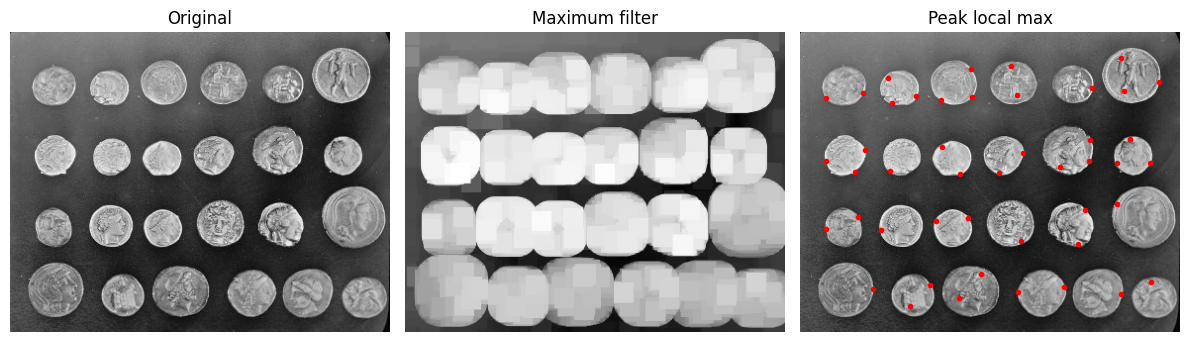

In [28]:
# display results
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharex=True, sharey=True, 
                         subplot_kw={'adjustable': 'box'})
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()
plt.show()

## Label image region

This example shows how to segment an image with image labeling. The following steps are applied:

1. Thresholding with automatic Otsu method
2. Close small holes with binary closing
3. Remove artifacts touching image border
4. Measure image regions to filter small objects

This example is adapted from [`plot_label`](http://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html).

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

image = data.coins()[50:-50, 50:-50]

In [30]:
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

/var/folders/61/0lj9r7px3k52gv9yfyx6ky300000gn/T/ipykernel_12610/1803724060.py:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  bw = closing(image > thresh, square(3))


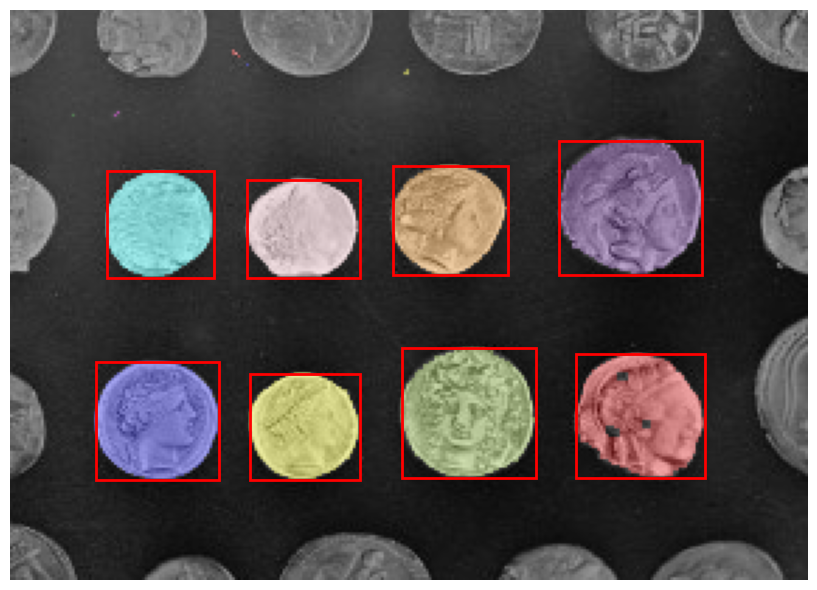

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()